<a href="https://colab.research.google.com/github/MohdAlobeidli/Foundation-of-Data-Science/blob/main/Activity2_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [37]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [39]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [40]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-40-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [41]:
pollution_data = merged_data[['pm10','neighborhood']]

In [42]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [43]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [44]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [45]:
pollution_data['pm10'].min()

0.0

In [46]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [47]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [48]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

In [ ]:
#Github link: https://github.com/MohdAlobeidli/Foundation-of-Data-Science.git

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [49]:
#Task 1:
#1.1 Display the first 5 rows of the joined_table using .show().
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [50]:
#1.2 Print the number of rows and columns in the table.
print("Number of rows: ",joined_table.num_rows)

print("Number of columns: ",joined_table.num_columns)


Number of rows:  118495
Number of columns:  2


In [51]:
#1.3 Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

# Identify columns with missing values
missing_values = joined_table.apply(lambda x: np.nan if x == "" or x is None else x)

# Remove rows with any missing values
new_joined_table = joined_table.where(np.all(missing_values != np.nan, axis=1))

# Display the cleaned table
new_joined_table.show(5)
#No missing values, thats why the number of rows didnt decrease

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [52]:
#Task 2
new_pollution_data = merged_data[['temperature','humidity','pm25','neighborhood']]

In [53]:
new_pollution_data.shape[0]

118495

In [54]:
type(new_pollution_data)

pandas.core.frame.DataFrame

In [55]:
task2Table = Table().from_df(new_pollution_data)
task2Table.show(5)

temperature,humidity,pm25,neighborhood
16.3,15.2,5.91,Bronx Park
16.2,15.1,1.18,Bronx Park
16.1,15.1,0.76,Bronx Park
16.1,15.2,4.48,Bronx Park
16,15.2,5.77,Bronx Park


In [57]:
#2.1 Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
def get_summary_stats(table, columns):

  def _mean(col):
    return np.mean(col)

  def _median(col):
    return np.median(col)

  def _min(col):
    return np.min(col)

  def _max(col):
    return np.max(col)

  stats_table = Table().with_columns("Statistic", ["Mean", "Median", "Min", "Max"])

  for column in columns:
    stats_table = stats_table.with_columns(
        column,
        [_mean(table.column(column)),
         _median(table.column(column)),
         _min(table.column(column)),
         _max(table.column(column))]
    )

  return stats_table

# Example usage:
summary_stats = get_summary_stats(task2Table, ["temperature", "humidity", "pm25"])
summary_stats.show()





Statistic,temperature,humidity,pm25
Mean,8.24158,50.1549,7.37452
Median,7.2,46.2,3.02
Min,-7.9,0,0
Max,10471,104.2,3267.02


In [58]:
#2.2 Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
# Group by 'borough' and compute the mean of 'pm25'
borough_avg_pm25 = task2Table.group("neighborhood", np.mean).select("neighborhood", "pm25 mean")

borough_avg_pm25.relabel('neighborhood', 'borough')


borough,pm25 mean
Allerton,4.20833
Astoria,1.29268
Belmont,15.053
Bronx Park,6.87867
Bronxdale,3.53619
Civic Center,4.09232
Claremont Village,5.6469
Concourse,8.44021
Concourse Village,6.84481
Country Club,12.8344


In [59]:
#2.3 Display the results
borough_avg_pm25.show()

borough,pm25 mean
Allerton,4.20833
Astoria,1.29268
Belmont,15.053
Bronx Park,6.87867
Bronxdale,3.53619
Civic Center,4.09232
Claremont Village,5.6469
Concourse,8.44021
Concourse Village,6.84481
Country Club,12.8344


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

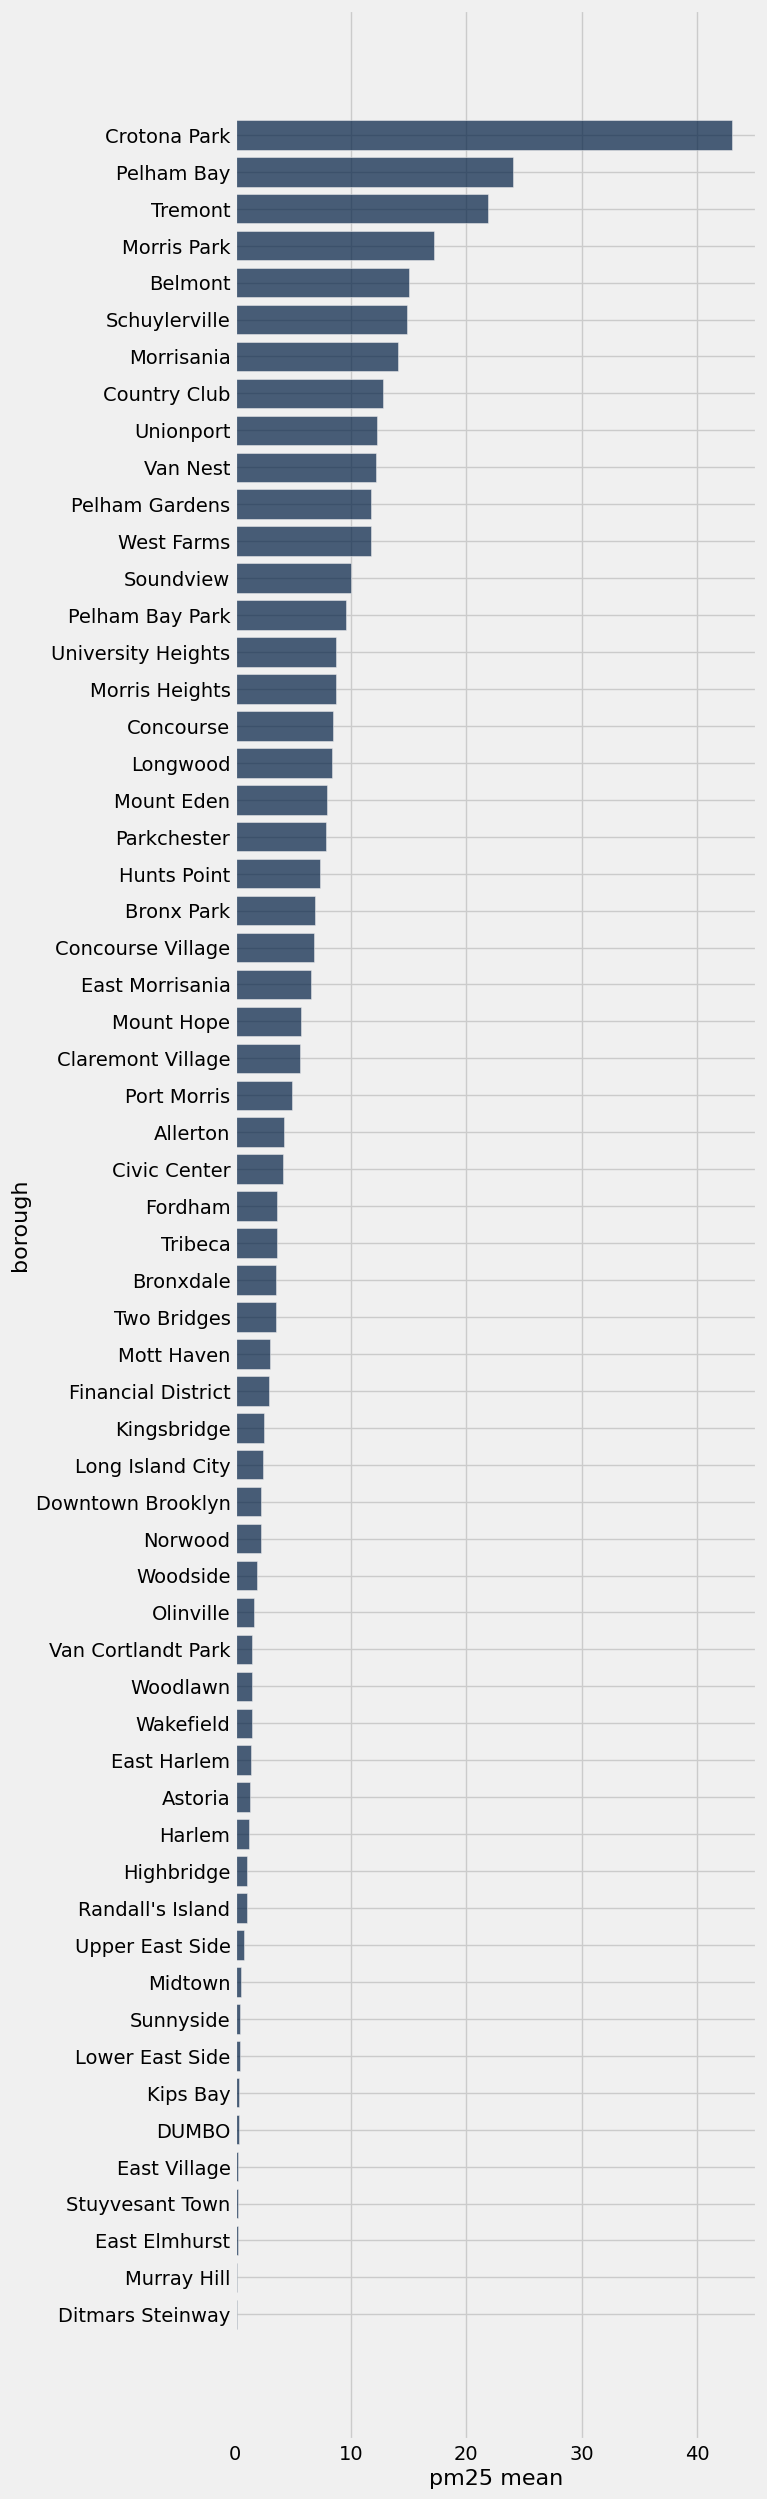

In [60]:
#Task 3
#3.1 Create a bar chart showing the average pm25 levels for each borough using .barh().
borough_avg_pm25.sort('pm25 mean', descending=True).barh("borough", "pm25 mean")

Text(0.5, 1.0, 'Temperature vs PM25')

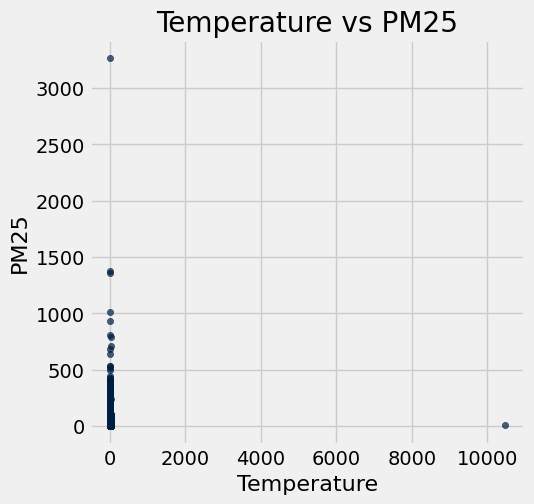

In [61]:
#3.2 Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
task2Table.scatter("temperature", "pm25")
plt.xlabel("Temperature")
plt.ylabel("PM25")
plt.title("Temperature vs PM25")



Text(0.5, 1.0, 'Temperature vs PM25')

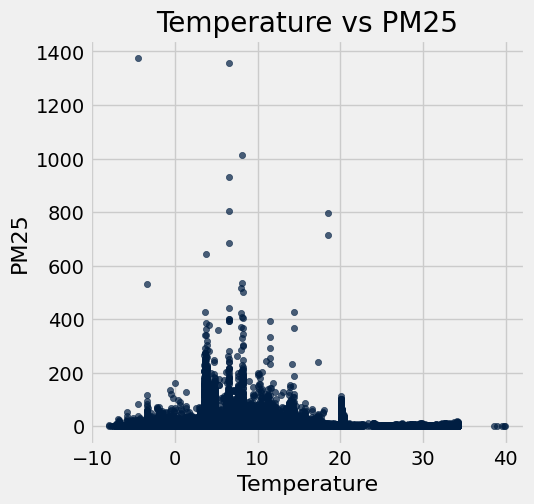

In [62]:
#If we remove the outliers, the scatter plot will look more clearer since outliers misrepresent the overall picture of the relation between the temperature and ph25
task2Table_Version2= task2Table.where("pm25", are.below(2000))
task2Table_Version2= task2Table_Version2.where("temperature", are.below(1000))
task2Table_Version2.scatter("temperature", "pm25")
plt.xlabel("Temperature")
plt.ylabel("PM25")
plt.title("Temperature vs PM25")

Text(0.5, 1.0, 'Distribution of Humidity')

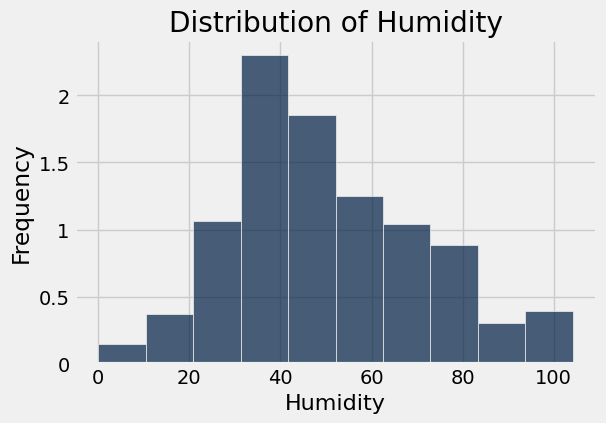

In [63]:
# 3.3 Create a histogram of humidity values across all neighborhoods using .hist().
task2Table.hist("humidity")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Distribution of Humidity")

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [64]:
# Task 4
# 4.1 Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows: "Good" if pm25 < 12 "Moderate" if 12 <= pm25 < 35 "Unhealthy" if pm25 >= 35
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif 12 <= pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"


In [65]:
# 4.2 Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
task2Table = task2Table.with_column("PM25_Category", task2Table.apply(calculate_pm25_category, "pm25"))
task2Table.show(5)

temperature,humidity,pm25,neighborhood,PM25_Category
16.3,15.2,5.91,Bronx Park,Good
16.2,15.1,1.18,Bronx Park,Good
16.1,15.1,0.76,Bronx Park,Good
16.1,15.2,4.48,Bronx Park,Good
16,15.2,5.77,Bronx Park,Good


In [68]:
# 4.3 Count the number of sensors in each PM2.5 category and display the results using .group().
CountingSensors=task2Table.group("PM25_Category")
CountingSensors.relabel('count', 'Number of Sensors')
CountingSensors.show()

PM25_Category,Number of Sensors
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [70]:
# Task 5
#5.1 Randomly sample 10% of the rows from the table without replacement using .sample().
#Calculate the mean pm25 level for the sampled data.

#5.2 Define the sample size (10% of the rows)
sample_size = int(0.1 * task2Table.num_rows)

# Randomly select 10% of the rows without replacement
sampled_table = task2Table.sample(with_replacement=False, k=sample_size)

# Compute the mean of pm25 in the sample
sample_mean = np.mean(sampled_table.column("pm25"))
print('mean pm25 level of the randomly sampled data', sample_mean)


mean pm25 level of the randomly sampled data 7.56848088446


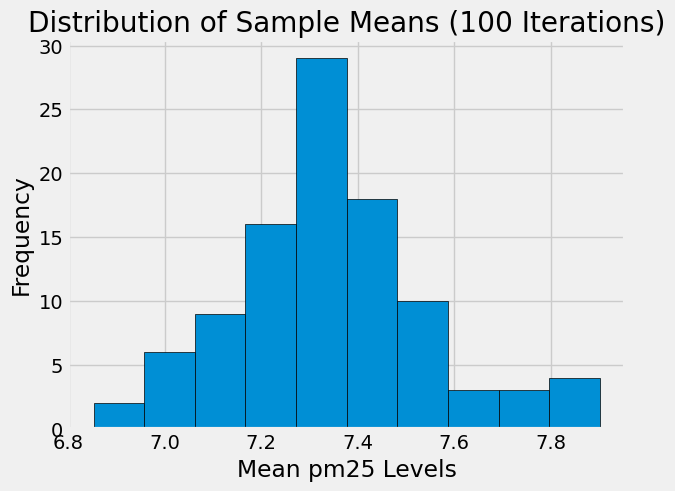

In [72]:
#Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
#Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

# Define the sample size (10% of the rows)
sample_size = int(0.1 * task2Table.num_rows)

# Initialize a list to store mean pm25 values
sample_means = []

# Repeat the sampling process 100 times
for _ in range(100):
    # Randomly select 10% of the rows without replacement
    sampled_table = task2Table.sample(with_replacement=False, k=sample_size)

    # Compute the mean of pm25 in the sample
    sample_mean = np.mean(sampled_table.column("pm25"))

    # Store the mean in the list
    sample_means.append(sample_mean)

# Plot histogram of the 100 sample means
plt.hist(sample_means, bins=10, edgecolor="black")
plt.xlabel("Mean pm25 Levels")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means (100 Iterations)")
plt.show()


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.